In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.preprocessing import StandardScaler
import sklearn as sk
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score# Importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import sklearn.linear_model as linear_model
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
#import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [83]:
train = pd.read_csv('./wine/train.csv')
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [84]:
test = pd.read_csv('./wine/test.csv')
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [85]:
submission = pd.read_csv('./wine/sample_submission.csv')
submission.head()

,index,quality
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


# 1. EDA

In [11]:
train.isna().sum()

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


# 3. Visualize

C:\Users\Playdata\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Playdata\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Playdata\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Playdata\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Playdata\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Playdata\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51

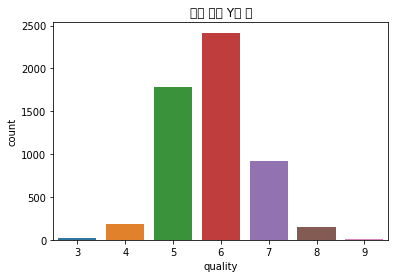

In [13]:
sns.countplot(x = 'quality', data = train )
plt.title('y')
plt.show()

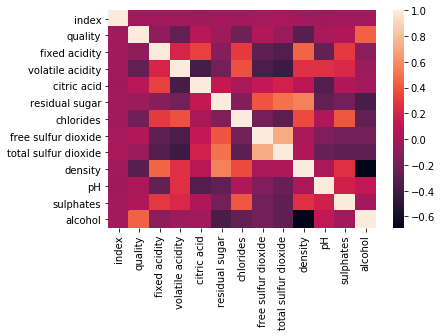

In [14]:
sns.heatmap(train.corr())

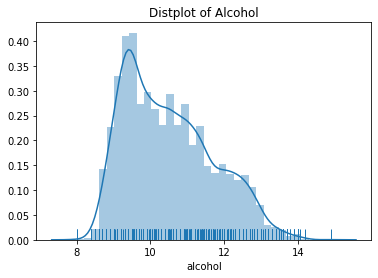

In [15]:
sns.distplot(train['alcohol'], kde=True, rug=True)
#sns.barplot(x=train['alcohol'], y=train['quality'])
plt.title('Distplot of Alcohol')
plt.show()

### see corrleation between Type and Quality

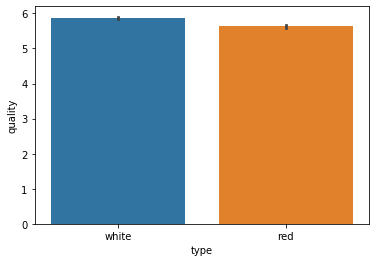

In [16]:
sns.barplot(x=train['type'], y=train['quality'])

# 2. fill NaN in train

In [86]:
train.loc[train['type'] == 'white', 'type'] = 0
train.loc[train['type'] == 'red', 'type'] = 1
train.head(10)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0
5,5,6,6.0,0.190,0.37,9.7,0.032,17.0,50.0,0.99320,3.08,0.66,12.0,0
6,6,5,6.1,0.220,0.49,1.5,0.051,18.0,87.0,0.99280,3.30,0.46,9.6,0
7,7,6,7.1,0.380,0.42,11.8,0.041,32.0,193.0,0.99624,3.04,0.49,10.0,0
8,8,5,6.8,0.240,0.31,18.3,0.046,40.0,142.0,1.00000,3.30,0.41,8.7,0
9,9,5,6.8,0.390,0.35,11.6,0.044,57.0,220.0,0.99775,3.07,0.53,9.3,0


## fill NaN in test

In [65]:
test.head(10)

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,0
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,1
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,0
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,0
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,0
5,5,6.5,0.26,0.28,12.5,0.046,80.0,225.0,0.99685,3.18,0.41,10.0,0
6,6,6.1,0.40,0.16,1.8,0.069,11.0,25.0,0.99550,3.42,0.74,10.1,1
7,7,7.3,0.28,0.42,14.4,0.040,49.0,173.0,0.99940,3.28,0.82,9.0,0
8,8,6.6,0.22,0.23,17.3,0.047,37.0,118.0,0.99906,3.08,0.46,8.8,0
9,9,7.1,0.25,0.39,2.1,0.036,30.0,124.0,0.99080,3.28,0.43,12.2,0


In [66]:
test.loc[test['type'] == 'white', 'type'] = 0
test.loc[test['type'] == 'red', 'type'] = 1
test.head(10)

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,0
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,1
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,0
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,0
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,0
5,5,6.5,0.26,0.28,12.5,0.046,80.0,225.0,0.99685,3.18,0.41,10.0,0
6,6,6.1,0.40,0.16,1.8,0.069,11.0,25.0,0.99550,3.42,0.74,10.1,1
7,7,7.3,0.28,0.42,14.4,0.040,49.0,173.0,0.99940,3.28,0.82,9.0,0
8,8,6.6,0.22,0.23,17.3,0.047,37.0,118.0,0.99906,3.08,0.46,8.8,0
9,9,7.1,0.25,0.39,2.1,0.036,30.0,124.0,0.99080,3.28,0.43,12.2,0


## 2-1) Alcohol data preprocessing

In [20]:
train2 = train.copy()

In [21]:
train2['alcohol'] = round(train2['alcohol'])
train2.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.0,0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,10.0,1
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,11.0,0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,11.0,0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,11.0,0


## 2-2) pH data preprocessing

In [22]:
train2['pH'] = round(train2['pH'],1)
train2.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.4,0.44,10.0,0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.2,0.59,10.0,1
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.0,0.52,11.0,0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.3,0.50,11.0,0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.0,0.43,11.0,0


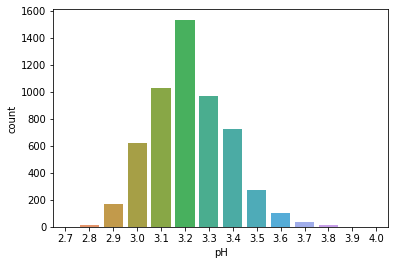

In [23]:
sns.countplot(x = 'pH', data=train2)

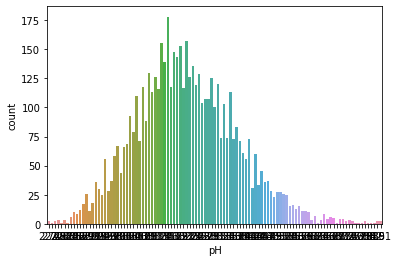

In [24]:
sns.countplot(x = 'pH', data=train)

### sulphates 
#### quality= if 3~4 , trunc,  if 5~6 , round,  if, 7~8 up

In [25]:
train2['sulphates'] = train2['sulphates'] * 10
train2.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.4,4.4,10.0,0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.2,5.9,10.0,1
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.0,5.2,11.0,0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.3,5.0,11.0,0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.0,4.3,11.0,0


In [26]:
train2.loc[(train2['quality'] == 5)|(train2['quality'] == 6) , 'sulphates'] = round(train2['sulphates'])
train2.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.4,4.0,10.0,0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.2,6.0,10.0,1
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.0,5.0,11.0,0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.3,5.0,11.0,0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.0,4.0,11.0,0


In [27]:
def upanddown(sulphates, act) :
    nt = sulphates.astype(int)
    if act == 'up' :
        answer = nt + 1
    else :
        answer = nt
    return answer

train2.loc[(train2['quality'] == 7)|(train2['quality'] == 8) , 'sulphates'] = upanddown(train2['sulphates'], 'up')
train2.loc[(train2['quality'] == 3)|(train2['quality'] == 4) , 'sulphates'] = upanddown(train2['sulphates'], 'down')


In [28]:
train2['sulphates'] = train2['sulphates'] / 10
train2.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.4,0.4,10.0,0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.2,0.6,10.0,1
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.0,0.5,11.0,0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.3,0.5,11.0,0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.0,0.4,11.0,0


In [57]:
y_train = train2[['quality']]
X_train = train2.drop(['index', 'quality'], axis=1)

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, 
                                                    test_size=0.2, 
                                                    random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4397, 12)
(1100, 12)
(4397, 1)
(1100, 1)


In [59]:
# Decision tree

model=DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction4=model.predict(X_test)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4, y_test))

# Random forest

model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train, y_train)
prediction6 = model.predict(X_test)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction6, y_test))

The accuracy of the Decision Tree is 0.6072727272727273


C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


The accuracy of the Random Forests is 0.6954545454545454


In [62]:
from sklearn.model_selection import GridSearchCV
import time

start = time.time()
params = {
    'n_estimators':[245, 250, 255, 260],
    'max_depth' : [ 25, 27, 28], 
    'min_samples_leaf' : [1, 2, 3],
    'min_samples_split' : [1, 2, 3, 4]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1, verbose=2 )
grid_cv.fit(X_train , y_train)

print('best parameter:\n', grid_cv.best_params_)
print('best predict accuracy: {0:.4f}'.format(grid_cv.best_score_))

print('time  : ', (time.time()-start) / 60)

Fitting 2 folds for each of 144 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  2.0min finished
C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


최적 하이퍼 파라미터:
 {'max_depth': 27, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 250}
최고 예측 정확도: 0.6211
실행시간 :  2.0470941424369813


In [63]:
rf_clf1 = RandomForestClassifier(n_estimators=250, max_depth=27, min_samples_leaf=2, \
                                 min_samples_split=2, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

'''
RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=2, \
                                 min_samples_split=8, random_state=0)
               예측 정확도: 0.6755                 
               
               (n_estimators=200, max_depth=25, min_samples_leaf=2, \
                                 min_samples_split=5, random_state=0)
                예측 정확도: 0.6836
RandomForestClassifier(n_estimators=250, max_depth=27, min_samples_leaf=2, \
                                 min_samples_split=3, random_state=0)
                                 예측 정확도: 0.6964

'''

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


예측 정확도: 0.6964


'\nRandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=2,                                  min_samples_split=8, random_state=0)\n               예측 정확도: 0.6755                 \n               \n               (n_estimators=200, max_depth=25, min_samples_leaf=2,                                  min_samples_split=5, random_state=0)\n                예측 정확도: 0.6836\nRandomForestClassifier(n_estimators=250, max_depth=27, min_samples_leaf=2,                                  min_samples_split=3, random_state=0)\n                                 예측 정확도: 0.6964\n\n'

In [37]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [38]:
rf_clf1 = RandomForestClassifier(n_estimators=200, max_depth=25, min_samples_leaf=2, \
                                 min_samples_split=5, random_state=0)
rf_clf1.fit(X_train , y_train)
rf_clf1.predict(X_test)
prediction6 = model.predict(X_test)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction6, y_test))

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


The accuracy of the Random Forests is 0.6236363636363637


## -for secure, copy data

In [45]:
y_train = train[['quality']]
X_train = train.drop(['index', 'quality'], axis=1)

In [46]:
y_train.head()

,quality
0,5
1,5
2,5
3,6
4,6


In [47]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0


In [48]:
print(X_train.shape)
print(y_train.shape)

(5497, 12)
(5497, 1)


In [49]:
y = y_train
X = X_train

In [50]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, 
                                                    test_size=0.2, 
                                                    random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4397, 12)
(1100, 12)
(4397, 1)
(1100, 1)


In [52]:
# radial SVM
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(X_train, y_train)
prediction1=model.predict(X_test)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,y_test))

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for rbf SVM is  0.5618181818181818


In [82]:
# Decision tree

model=DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction4=model.predict(X_test)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4, y_test))

The accuracy of the Decision Tree is 0.6154545454545455


In [23]:
# KNN 군집분석

model=KNeighborsClassifier() 
model.fit(X_train, y_train)
prediction4=model.predict(X_test)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction4, y_test))

The accuracy of the KNN is 0.4636363636363636


C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [119]:
# Random forest

model = RandomForestClassifier(random_state = 156)
model.fit(X_train, y_train)
prediction6 = model.predict(test2)
rf = model.predict_proba(test2)
#print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction6, y_test))

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


# GridGV

In [55]:
from sklearn.model_selection import GridSearchCV
import time

start = time.time()
params = {
    'n_estimators':[ 269, 270, 271],
    'max_depth' : [ 26, 27, 28], 
    'min_samples_leaf' : [1, 2],
    'min_samples_split' : [8, 9, 10]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1, verbose=2 )
grid_cv.fit(X_train , y_train)

print('best parameter :\n', grid_cv.best_params_)
print('best predict accuracy: {0:.4f}'.format(grid_cv.best_score_))

print('time : ', (time.time()-start) / 60)

#0.6273

Fitting 2 folds for each of 54 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   59.1s finished
C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


최적 하이퍼 파라미터:
 {'max_depth': 26, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 271}
최고 예측 정확도: 0.6068
실행시간 :  1.012255342801412


In [56]:
rf_clf1 = RandomForestClassifier(n_estimators=270, max_depth=28, min_samples_leaf=1, \
                                 min_samples_split=9, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('best predict accuracy: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 0.6564
#(n_estimators=200, max_depth=15, min_samples_leaf=3, \
#                                 min_samples_split=4, random_state=0)
# 예측 정확도: 0.9527 RandomForestClassifier(n_estimators=250, max_depth=20, min_samples_leaf=1, \
                                #min_samples_split=9, random_state=0)
'''
     예측 정확도: 0.8527
    rf_clf1 = RandomForestClassifier(n_estimators=270, max_depth=28, min_samples_leaf=1, \
                                 min_samples_split=9, random_state=0)
'''

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


예측 정확도: 0.6782


'\n     예측 정확도: 0.8527\n    rf_clf1 = RandomForestClassifier(n_estimators=270, max_depth=28, min_samples_leaf=1,                                  min_samples_split=9, random_state=0)\n'

# GBM

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

#X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.5936
GBM 수행 시간: 6.2 초 


# 07/20 Regression apply

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4397 entries, 3302 to 1289
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4397 non-null   float64
 1   volatile acidity      4397 non-null   float64
 2   citric acid           4397 non-null   float64
 3   residual sugar        4397 non-null   float64
 4   chlorides             4397 non-null   float64
 5   free sulfur dioxide   4397 non-null   float64
 6   total sulfur dioxide  4397 non-null   float64
 7   density               4397 non-null   float64
 8   pH                    4397 non-null   float64
 9   sulphates             4397 non-null   float64
 10  alcohol               4397 non-null   float64
 11  type                  4397 non-null   object 
dtypes: float64(11), object(1)
memory usage: 446.6+ KB


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = y_train
X_data = X_train

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit( ,y_train )
y_preds = lr.predict(X_test)
# accuracy score가 아니라 mse 와 rmse 로 확인 0에 가까울 수록 좋다. 
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse) #루트 씌워서... 따로 제공해 주는게 없어서..

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score = R제곱 -> 1에 가까울 수록 좋다 (0과 1사이)')
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 0.520 , RMSE : 0.721
Variance score = R제곱 -> 1에 가까울 수록 좋다 (0과 1사이)
Variance score : 0.307


In [34]:
from sklearn.model_selection import cross_val_score

y_target = y_train
X_data = X_train
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
# scoring - neg = negative 결과 값에 -마이너스를 붙인다 . 왜?
# RSE에서는 점수가 낮은게 좋은거. 
# 기존 내장 분류함수는 높을 수록 좋다고 되어 있으니까 마이너스를 붙인다. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)


rmse_scores  = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
# 교차검등해서 객관적으로 잘 나오게 나누기 5로 해준다 

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
# 12.46 제일 잘 나온다. 80.76  grid에서는 제일 높게 그래서 마이너스를 붙이는 거다.
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0.56 -0.57 -0.56 -0.53 -0.54]
 5 folds 의 개별 RMSE scores :  [0.75 0.76 0.75 0.73 0.74]
 5 folds 의 평균 RMSE : 0.743 


# multi Dimension & Degree (1~7)

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
degrees = [1,2,3,4,5,6,7] #7차식까지 다항식을 만들어간다.

# 다항 회귀의 차수(degree)를 1~7까지로 각각 변화시키면서 비교합니다.

for i in range(len(degrees)):
    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_data, y_target)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X_data, y_target,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다. w 계수들 '.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
print(' 뒤로 갈 수록 overfitting')


Degree 1 회귀 계수는 [[   0.   -1.   -0.    0.    0.    0.   -0. -107.    1.    1.    0.    0.]] 입니다. w 계수들 
Degree 1 MSE 는 0.55 입니다.

Degree 2 회귀 계수는 [[-4.400e+01  1.960e+02  5.650e+02 -1.600e+01 -1.853e+03 -5.000e+00
   2.000e+00 -7.556e+03  2.530e+02 -1.220e+02  2.200e+01 -9.000e+00
  -0.000e+00  0.000e+00  1.000e+00 -0.000e+00 -3.000e+00 -0.000e+00
   0.000e+00  4.500e+01 -0.000e+00 -0.000e+00  0.000e+00  0.000e+00
  -0.000e+00  1.000e+00 -0.000e+00  5.000e+00  0.000e+00  0.000e+00
  -2.080e+02  1.000e+00 -0.000e+00  0.000e+00  1.000e+00 -2.000e+00
   0.000e+00  9.000e+00  0.000e+00 -0.000e+00 -5.830e+02  4.000e+00
  -0.000e+00 -0.000e+00 -1.000e+00 -0.000e+00 -1.000e+00 -0.000e+00
   0.000e+00  1.600e+01 -0.000e+00 -0.000e+00  0.000e+00  0.000e+00
  -8.000e+00  0.000e+00  0.000e+00  1.919e+03 -1.300e+01 -6.000e+00
   1.000e+00  2.000e+00 -0.000e+00 -0.000e+00  5.000e+00 -0.000e+00
   0.000e+00  0.000e+00 -0.000e+00 -0.000e+00 -2.000e+00  0.000e+00
  -0.000e+00 -0.000e+00 -0.000e+00  4

In [93]:
# Degree 2 MSE 는 0.53 입니다.
# 2일때 가장 낮은 것

# submission

In [93]:
submission.head()

,index,quality
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [94]:
y_train['quality'].unique()

array([5, 6, 7, 4, 8, 9, 3], dtype=int64)

In [95]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
3302,6.15,0.21,0.37,3.2,0.021,20.0,80.0,0.99076,3.4,0.5,12.0,0
4287,8.80,0.39,0.35,1.8,0.096,22.0,80.0,0.99016,3.0,0.5,13.0,0
1216,7.80,0.28,0.31,2.1,0.046,28.0,208.0,0.99434,3.2,0.6,10.0,0
467,7.90,0.18,0.36,5.9,0.058,31.0,132.0,0.99500,3.2,0.5,11.0,0
5128,7.40,0.28,0.36,1.1,0.028,42.0,105.0,0.98930,3.0,0.4,12.0,0


In [96]:
sub = pd.DataFrame(test['index'])

In [97]:
sub['quality'] = 0
sub.head(3)

,index,quality
0,0,0
1,1,0
2,2,0


In [124]:
sub['quality'] = arr

In [125]:
sub

,index,quality
0,0,5
1,1,5
2,2,6
3,3,5
4,4,6
...,...,...
995,995,5
996,996,6
997,997,5
998,998,6


In [126]:
sub.to_csv('./wine/just_rf2.csv', index=False)

# sub Modeling

In [70]:
test2 = test.drop('index', axis=1)

In [74]:
y_train['quality'].unique()

array([5, 6, 7, 4, 8, 9, 3], dtype=int64)

In [118]:
# Random forest

model = RandomForestClassifier(n_estimators = 1)
model.fit(X_train, y_train)
model.predict(test2)
rf = model.predict_proba(test2)

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [113]:
rf

array([[0.02, 0.19, 0.36, ..., 0.09, 0.06, 0.  ],
       [0.1 , 0.12, 0.36, ..., 0.02, 0.  , 0.  ],
       [0.02, 0.01, 0.31, ..., 0.15, 0.01, 0.  ],
       ...,
       [0.  , 0.03, 0.62, ..., 0.03, 0.  , 0.  ],
       [0.  , 0.01, 0.13, ..., 0.01, 0.01, 0.  ],
       [0.06, 0.  , 0.33, ..., 0.18, 0.01, 0.  ]])

## find highest probabilty on one row, = that is expected quality of wine quality.  save best number in one row, save in new array, -> to_csv and submit

In [120]:

arr = []
for i in range(len(rf)) :
    index = 0
    index_max = np.argmax(rf[i]) + 3
    arr.append(index_max)
        

### check columns of X_train, test

In [68]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4397 entries, 3302 to 1289
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4397 non-null   float64
 1   volatile acidity      4397 non-null   float64
 2   citric acid           4397 non-null   float64
 3   residual sugar        4397 non-null   float64
 4   chlorides             4397 non-null   float64
 5   free sulfur dioxide   4397 non-null   float64
 6   total sulfur dioxide  4397 non-null   float64
 7   density               4397 non-null   float64
 8   pH                    4397 non-null   float64
 9   sulphates             4397 non-null   float64
 10  alcohol               4397 non-null   float64
 11  type                  4397 non-null   object 
dtypes: float64(11), object(1)
memory usage: 446.6+ KB


In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 1000 non-null   int64  
 1   fixed acidity         1000 non-null   float64
 2   volatile acidity      1000 non-null   float64
 3   citric acid           1000 non-null   float64
 4   residual sugar        1000 non-null   float64
 5   chlorides             1000 non-null   float64
 6   free sulfur dioxide   1000 non-null   float64
 7   total sulfur dioxide  1000 non-null   float64
 8   density               1000 non-null   float64
 9   pH                    1000 non-null   float64
 10  sulphates             1000 non-null   float64
 11  alcohol               1000 non-null   float64
 12  type                  1000 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 101.7+ KB


In [71]:
from sklearn.ensemble import RandomForestClassifier 
rf_clf1 = RandomForestClassifier(n_estimators=250, max_depth=27, min_samples_leaf=2, \
                                 min_samples_split=3, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(test2)
rf_gridSearch = model.predict_proba(test2)

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [114]:
arr_rf_gridSearch = []
for i in range(len(rf)) :
    index = 0
    index_max = np.argmax(rf[i]) + 3
    arr_rf_gridSearch.append(index_max)

# GBM

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

#X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_clf.predict(test2)
gbm = gb_clf.predict_proba(test2)

In [ ]:
arr_gbm = []
for i in range(len(gbm)) :
    index = 0
    index_max = np.argmax(gbm[i]) + 3
    arr_gbm.append(index_max)

### -> find out  GBM is not best for result so, submit random forest Grid Search GV
# I submited to Dacon, accuracy was 0.698, rank 2. (and same accuracy with rank1)